
# Đề Tài: Nghiên cứu sự ảnh hưởng của thời gian ngủ đến nhịp tim ở người trưởng thành

## Mô tả tập dữ liệu

1. **id**: số thứ tự cho mỗi cá nhân được khảo sát (1-15000)

2. **gender**: giới tính (Male-Female)

3. **age**: độ tuổi (27-59)

4. **occupation**: nghề nghiệp (11 ngành nghề)

5. **sleep-duration**: thời gian ngủ (5.8 - 8.5), đơn vị: giờ/đêm

6. **heart-rate**: nhịp tim (65 - 86), đơn vị: nhịp/phút

7. **blood-pressure**: huyết áp, đơn vị: mm/Hg

8. **bmi**: chỉ số BMI (Normal Weight, Normal, Overweight, Obese)

*Source*: https://www.kaggle.com/

In [2]:
# Import các thư viện sử dụng trong quá trình tính toán
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [3]:
# Dùng panda import data bằng cách đọc file csv
df = pd.read_csv("data.csv")

# Chỉ lấy cột sleep-duration
sleep = df["sleep-duration"]

# Chỉ lấy cột heart-rate
rate = df["heart-rate"]

df.head()

,id,gender,age,occupation,sleep-duration,heart-rate,blood-pressure,bmi
0,1,Male,35,Doctor,6.65,71,120/80,Normal Weight
1,2,Male,42,Teacher,6.90,66,135/90,Normal
2,3,Male,34,Software Engineer,6.95,74,126/83,Overweight
3,4,Male,32,Doctor,6.90,71,120/80,Normal
4,5,Male,37,Lawyer,6.85,71,125/80,Normal


In [43]:
# Kiểm tra trong bảng dữ liệu có giá trị null không
df.isnull().sum()

id                0
gender            0
age               0
occupation        0
sleep-duration    0
heart-rate        0
blood-pressure    0
bmi               0
dtype: int64

#### Nhận xét: không có giá trị null nào trong tập dữ liệu

# Phần 1: Tính toán các thông số cơ bản

In [9]:
# Tính toán các thống kê cơ bản
mean_sleep = df["sleep-duration"].mean()
median_sleep = df["sleep-duration"].median()
var_sleep = df["sleep-duration"].var()
std_sleep = df["sleep-duration"].std()
mode_sleep = df["sleep-duration"].mode()[0]
range_sleep = df["sleep-duration"].max() - df["sleep-duration"].min()

mean_rate = df["heart-rate"].mean()
median_rate = df["heart-rate"].median()
var_rate = df["heart-rate"].var()
std_rate = df["heart-rate"].std()
mode_rate = df["heart-rate"].mode()[0]
range_rate = df["heart-rate"].max() - df["heart-rate"].min()

# In các thông số ra màn hình 
print("** Sleep Duration ** ")
print("Mean = ", mean_sleep.round(3))
print("Median = ", median_sleep)
print("Range = ", range_sleep)
print("Mode = ", mode_sleep)
print("Variance = ", round(var_sleep, 3))
print("Standard variance = ", round(std_sleep, 3))

print("\n** Heart Rate ** ")
print("Mean = ", mean_rate.round(3))
print("Median = ", median_rate)
print("Range = ", range_rate)
print("Mode = ", mode_rate)
print("Variance = ", round(var_rate, 3))
print("Standard variance = ", round(std_rate, 3))

** Sleep Duration ** 
Mean =  6.997
Median =  7.0
Range =  2.7
Mode =  6.5
Variance =  0.378
Standard variance =  0.615

** Heart Rate ** 
Mean =  70.858
Median =  70.0
Range =  21
Mode =  68
Variance =  13.067
Standard variance =  3.615


### Nhận xét
- **Mean:** cung cấp một cái nhìn tổng quát về thời gian ngủ của nhóm được khảo sát
- **Median:** Trung vị không bị ảnh hưởng bởi các giá trị cực đoan và do đó, nó cung cấp một cái nhìn chính xác hơn về một thuộc tính điển hình của nhóm
- **Range:** chỉ ra sự khác biệt giữa giá trị dài nhất và ngắn nhất.
- **Mode:** giá trị phổ biến nhất hoặc xu hướng xuất hiện nhiều nhất trong tập dữ liệu
- **Variance:** đo lường mức độ phân tán của các giá trị xung quanh giá trị trung bình
- **Standard variance:** cho thấy mức độ biến động của dữ liệu 
#### Sleep Duration
- **Mean = 6.997**: Trung bình, một người trong mẫu dữ liệu ngủ khoảng 6.997 giờ/đêm
- **Median = 7.0**: Nửa số người trong mẫu dữ liệu ngủ ít hơn 7.0 giờ/đêm và nửa số người còn lại ngủ nhiều hơn 7.0 giờ. 
- **Range = 2.7**: Khoảng cách giữa thời gian ngủ dài nhất và ngắn nhất trong mẫu là 2.7 giờ
- **Mode = 6.5**: phần lớn người trưởng thành trong nghiên cứu có xu hướng ngủ khoảng 6.5 giờ
- **Variance = 0.378**: thời gian ngủ của người trưởng thành trong tập dữ liệu tương đối ổn định và không có sự biến động lớn
- **Standard variance = 0.615**: Độ lệch chuẩn là 0.615 giờ, cho thấy rằng hầu hết các giá trị thời gian ngủ lệch không quá xa so với giá trị trung bình (6.997 giờ)
#### Heart Rate
- **Mean = 70.858**: Trung bình, nhịp tim của người trong mẫu dữ liệu là khoảng 70.858 nhịp/phút
- **Median = 70.0**:  Nửa số người trong mẫu dữ liệu có nhịp tim ít hơn 70.0 nhịp/phút và nửa số người còn lại có nhịp tim cao hơn 70.0 nhịp/phút 
- **Range = 21**: Khoảng cách giữa nhịp tim cao nhất và thấp nhất trong mẫu là 21 nhịp/phút
- **Mode = 68**: phần lớn người trưởng thành trong nghiên cứu có nhịp tim 68 nhịp/phút
- **Variance = 13.067**: nhịp tim của người trưởng thành trong tập dữ liệu này có sự dao động đáng kể. Có nghĩa là không phải ai cũng có nhịp tim gần với giá trị trung bình, mà có nhiều người có nhịp tim cao hơn hoặc thấp hơn nhiều so với giá trị trung bình
- **Standard variance = 3.615**: Độ lệch chuẩn là 3.615 nhịp mỗi phút, cho thấy rằng hầu hết các giá trị nhịp tim lệch không quá xa so với giá trị trung bình (70.858 nhịp/phút)


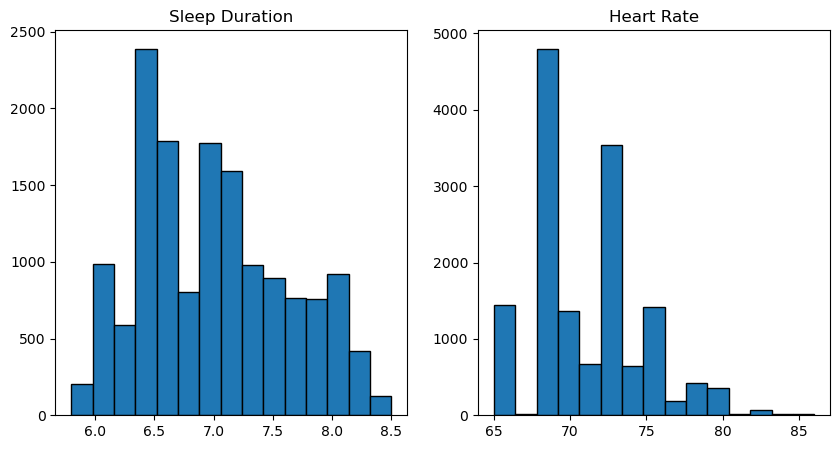

In [42]:
# Tùy chỉnh độ width height của biểu đồ
plt.figure(figsize=(10,5))

# Biểu đồ histograms của sleep-duration
plt.subplot(1,2,1)
plt.hist(x=sleep, bins=15, edgecolor='black')
plt.title("Sleep Duration")

# Biểu đồ histograms của heart-rate
plt.subplot(1,2,2)
plt.hist(x=rate, bins=15, edgecolor='black')
plt.title("Heart Rate")

plt.show()

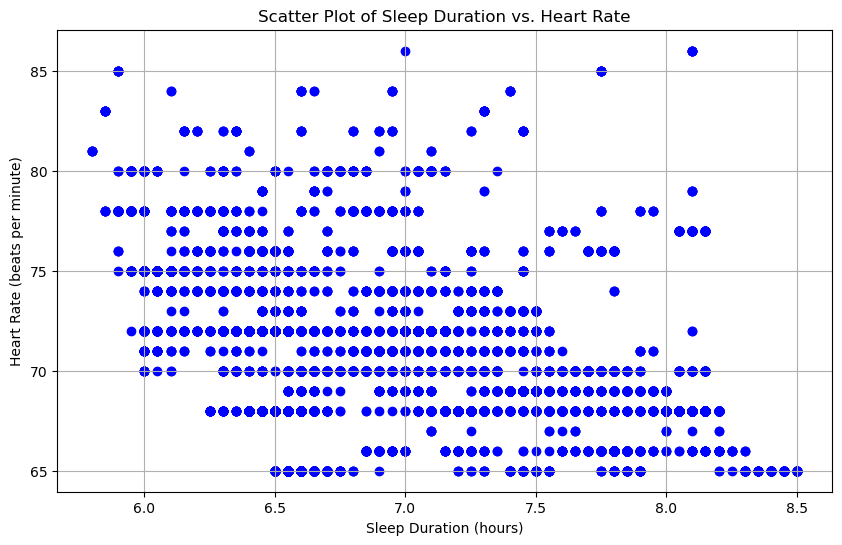

In [39]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=sleep, y=rate, color='blue')

# Thêm tiêu đề và nhãn
plt.title('Scatter Plot of Sleep Duration vs. Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (beats per minute)')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [67]:
# Tính toán các giá trị Tứ phân vị của Sleep Duration
q1_sleep = sleep.quantile(0.25)
q2_sleep = sleep.quantile(0.5)
q3_sleep = sleep.quantile(0.75)
iqr_sleep = q3_sleep - q1_sleep

# Tính các ngưỡng cho giá trị ngoại lai
lower_bound = q1_sleep - 1.5 * iqr_sleep
upper_bound = q3_sleep + 1.5 * iqr_sleep

# Xác định các giá trị ngoại lai
outliers = sleep[(sleep < lower_bound) | (sleep > upper_bound)]

print("** Sleep Duration **")
print("Q1 = ", q1_sleep)
print("Q2 = ", q2_sleep)
print("Q3 = ", q3_sleep)
print("IQR = ", round(iqr_sleep, 2))
print("Outliers = ", outliers.count())


** Sleep Duration **
Q1 =  6.5
Q2 =  7.0
Q3 =  7.45
IQR =  0.95
Outliers =  0


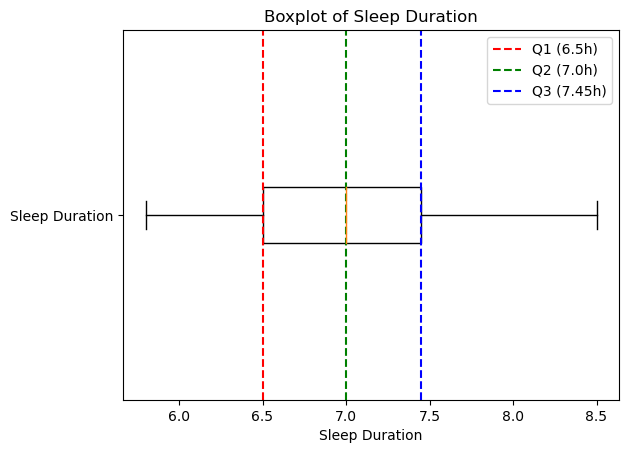

In [48]:
# Vẽ biểu đồ boxplot của sleep-duration
plt.boxplot(sleep, vert=False)
plt.title('Boxplot of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.yticks([1], ['Sleep Duration'])

# Đánh dấu các phần tư
plt.axvline(x=6.5, color='r', linestyle='--', label='Q1 (6.5h)')
plt.axvline(x=7.0, color='g', linestyle='--', label='Q2 (7.0h)')
plt.axvline(x=7.45, color='b', linestyle='--', label='Q3 (7.45h)')

plt.legend()
plt.show()

### Nhận xét:
- **Q1 = 6.5:**  25% số người trong mẫu dữ liệu có thời gian ngủ ít hơn hoặc bằng 6.5 giờ mỗi đêm
- **Q2 = 7.0:** 50% số người trong mẫu dữ liệu có thời gian ngủ ít hơn hoặc bằng 7.0 giờ mỗi đêm. Q2 chính là giá trị trung vị
- **Q3 = 7.45:** 75% số người trong mẫu dữ liệu có thời gian ngủ ít hơn hoặc bằng 7.45 giờ mỗi đêm.
- **IQR = 0.95:** sự phân tán giá trị thời gian ngủ của 50% người ở giữa trong mẫu dữ liệu. IQR nhỏ (0.95) cho thấy thời gian ngủ của phần lớn người trong mẫu không phân tán nhiều.
- **Outliers**: Không có

In [71]:
# Tính toán các giá trị Tứ phân vị của Heart Rate
q1_rate = rate.quantile(0.25)
q2_rate = rate.quantile(0.5)
q3_rate = rate.quantile(0.75)
iqr_rate = q3_rate - q1_rate

# Tính các ngưỡng cho giá trị ngoại lai
lower_bound = q1_rate - 1.5 * iqr_rate
upper_bound = q3_rate + 1.5 * iqr_rate

# Xác định các giá trị ngoại lai
outliers = rate[(rate < lower_bound) | (rate > upper_bound)]
print("\n** Heart Rate **")
print("Q1 = ", q1_rate)
print("Q2 = ", q2_rate)
print("Q3 = ", q3_rate)
print("IQR = ", iqr_rate)
print("Outliers = ", outliers.count())



** Heart Rate **
Q1 =  68.0
Q2 =  70.0
Q3 =  72.0
IQR =  4.0
Outliers =  479
Outliers: > 78.0


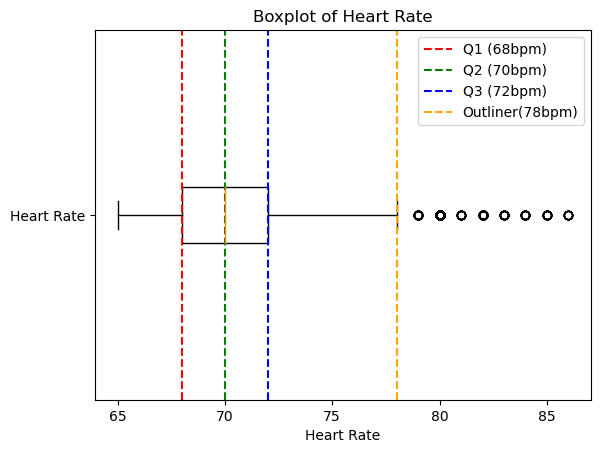

In [72]:
# Vẽ biểu đồ boxplot của heart-rate
plt.boxplot(rate, vert=False)
plt.title('Boxplot of Heart Rate')
plt.xlabel('Heart Rate')
plt.yticks([1], ['Heart Rate'])

# Đánh dấu các phần tư
plt.axvline(x=68.0, color='r', linestyle='--', label='Q1 (68bpm)')
plt.axvline(x=70.0, color='g', linestyle='--', label='Q2 (70bpm)')
plt.axvline(x=72.0, color='b', linestyle='--', label='Q3 (72bpm)')
plt.axvline(x=78.0, color='orange', linestyle='--', label='Outliner(78bpm)')
plt.legend()
plt.show()

### Nhận xét:
- **Q1 = 68:** 25% số người trong mẫu dữ liệu có nhịp tim ít hơn hoặc bằng 68 nhịp/phút
- **Q2 = 70:** 50% số người trong mẫu dữ liệu có nhịp tim ít hơn hoặc bằng 70 nhịp/phút. Q2 chính là giá trị trung vị
- **Q3 = 72:** 75% số người trong mẫu dữ liệu có nhịp tim ít hơn hoặc bằng 72 nhịp/phút
- **IQR = 4:** sự phân tán giá trị nhịp tim của 50% người ở giữa trong mẫu dữ liệu. 4.0 nhịp/phút, cho thấy nhịp tim của phần lớn người trong mẫu không phân tán nhiều.
- **Outliers**: có 479 giá trị ngoại lai (> 78 nhịp/phút)

# Phần 2: Tính toán khoảng tin cậy cho tổng thể

## Tính CI Mean cho Sleep Duration:
- Xây dựng 95% khoảng tin cậy **hai phía** của giá trị trung bình thật sự của Sleep Duration trong tập dữ liệu
- Xây dựng 95% khoảng tin cậy **trên** của giá trị trung bình thật sự của Sleep Duration trong tập dữ liệu
- Xây dựng 95% khoảng tin cậy **dưới** của giá trị trung bình thật sự của Sleep Duration trong tập dữ liệu

In [18]:
# Giá trị trung bình và độ lệch chuẩn của Sleep Duration
mean_sleep 
std_sleep

# Kích thước mẫu
n = len(sleep)

# Mức ý nghĩa (alpha) cho khoảng tin cậy 95%
alpha = 0.05

# 95% khoảng tin cậy hai phía
z = stats.norm.ppf(1 - alpha/2)
margin_of_error = z * (std_sleep / np.sqrt(n))
lower_bound = mean_sleep - margin_of_error
upper_bound = mean_sleep + margin_of_error
print("95% khoảng tin cậy hai phía: ({:.2f}, {:.2f})".format(lower_bound, upper_bound))

# 95% khoảng tin cậy trên
z = stats.norm.ppf(1 - alpha)
upper_bound = mean_sleep + z * (std_sleep / np.sqrt(n))
print("95% khoảng tin cậy trên: {:.3f}".format(upper_bound))

# 95% khoảng tin cậy dưới
z = stats.norm.ppf(1 - alpha)
lower_bound = mean_sleep - z * (std_sleep / np.sqrt(n))
print("95% khoảng tin cậy dưới: {:.3f}".format(lower_bound))

95% khoảng tin cậy hai phía: (6.99, 7.01)
95% khoảng tin cậy trên: 7.006
95% khoảng tin cậy dưới: 6.989


### Nhận xét:
- **Khoảng tin cậy hai phía:** mức độ tin cậy 95%, giá trị trung bình thật sự của Sleep Duration nằm trong khoảng từ 6.99 giờ đến 7.01 giờ
- **Khoảng tin cậy trên:** mức độ tin cậy 95%, giá trị trung bình thật sự của Sleep Duration không vượt quá 7.006 giờ
- **Khoảng tin cậy dưới:** mức độ tin cậy 95%, giá trị trung bình thật sự của Sleep Duration không thấp hơn 6.989 giờ

## Tính CI Mean cho Heart Rate:
- Xây dựng 95% khoảng tin cậy **hai phía** của giá trị trung bình thật sự của Heart Rate trong tập dữ liệu
- Xây dựng 95% khoảng tin cậy **trên** của giá trị trung bình thật sự của Heart Rate trong tập dữ liệu
- Xây dựng 95% khoảng tin cậy **dưới** của giá trị trung bình thật sự của Heart Rate trong tập dữ liệu

In [19]:
# Giá trị trung bình và độ lệch chuẩn của Heart Rate
mean_rate
std_rate

# Kích thước mẫu
n = len(rate)

# Mức ý nghĩa (alpha) cho khoảng tin cậy 95%
alpha = 0.05

# 95% khoảng tin cậy hai phía
z = stats.norm.ppf(1 - alpha/2)
margin_of_error = z * (std_rate / np.sqrt(n))
lower_bound = mean_rate - margin_of_error
upper_bound = mean_rate + margin_of_error
print("95% khoảng tin cậy hai phía: ({:.2f}, {:.2f})".format(lower_bound, upper_bound))

# 95% khoảng tin cậy trên
z = stats.norm.ppf(1 - alpha)
upper_bound = mean_rate + z * (std_rate / np.sqrt(n))
print("95% khoảng tin cậy trên: {:.3f}".format(upper_bound))

# 95% khoảng tin cậy dưới
z = stats.norm.ppf(1 - alpha)
lower_bound = mean_rate - z * (std_rate / np.sqrt(n))
print("95% khoảng tin cậy dưới: {:.3f}".format(lower_bound))

95% khoảng tin cậy hai phía: (70.80, 70.92)
95% khoảng tin cậy trên: 70.906
95% khoảng tin cậy dưới: 70.809


### Nhận xét:
- **Khoảng tin cậy hai phía:** mức độ tin cậy 95%, giá trị trung bình thật sự của nhịp tim nằm trong khoảng từ 70.80 nhịp/phút đến 70.92 nhịp/phút
- **Khoảng tin cậy trên:** mức độ tin cậy 95%, giá trị trung bình thật sự của nhịp tim không vượt quá 70.906 nhịp/phút.
- **Khoảng tin cậy dưới:** mức độ tin cậy 95%, giá trị trung bình thật sự của nhịp tim không thấp hơn 70.809 nhịp/phút.

## Tính Large-Sample CI cho Sleep Duration
- Xây dựng 95% khoảng tin cậy **hai phía** của những người có thời gian ngủ lớn hơn 7 giờ/ngày
- Xây dựng 95% khoảng tin cậy **trên** của những người có thời gian ngủ lớn hơn 7 giờ/ngày
- Xây dựng 95% khoảng tin cậy **dưới** của những người có thời gian ngủ lớn hơn 7 giờ/ngày

In [28]:
# Tính số người có thời gian ngủ lớn hơn 7 giờ/ngày
n = len(sleep)
k = np.sum(sleep > 7)
p_hat = k / n

# Đặt mức ý nghĩa
alpha = 0.05

# 95% khoảng tin cậy hai phía
z = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z * np.sqrt(p_hat * (1 - p_hat) / n)
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error
print("95% khoảng tin cậy hai phía: ({:.3f}, {:.3f})".format(lower_bound, upper_bound))

# 95% khoảng tin cậy trên
z = stats.norm.ppf(1 - alpha)
upper_bound = p_hat + z * np.sqrt(p_hat * (1 - p_hat) / n)
print("95% khoảng tin cậy trên: {:.3f}".format(upper_bound))

# 95% khoảng tin cậy dưới
z = stats.norm.ppf(1- alpha)
lower_bound = p_hat - z * np.sqrt(p_hat * (1 - p_hat) / n)
print("95% khoảng tin cậy dưới: {:.3f}".format(lower_bound))

95% khoảng tin cậy hai phía: (0.466, 0.482)
95% khoảng tin cậy trên: 0.481
95% khoảng tin cậy dưới: 0.467


### Nhận xét:
- **Khoảng tin cậy hai phía:** mức độ tin cậy 95%, tỷ lệ thật sự của những người có thời gian ngủ lớn hơn 7 giờ/ngày nằm trong khoảng từ 46.6% đến 48.2%
- **Khoảng tin cậy trên:** mức độ tin cậy 95%, tỷ lệ những người có thời gian ngủ lớn hơn 7 giờ/ngày không vượt quá 48.1%
- **Khoảng tin cậy dưới:** mức độ tin cậy 95%, tỷ lệ những người có thời gian ngủ lớn hơn 7 giờ/ngày không thấp hơn 46.7%

## Tính Large-Sample CI cho Heart Rate
- Xây dựng 95% khoảng tin cậy **hai phía** của những người có nhịp tim nhỏ hơn giá trị trung bình
- Xây dựng 95% khoảng tin cậy **trên** của những người có nhịp tim nhỏ hơn giá trị trung bình
- Xây dựng 95% khoảng tin cậy **dưới** của những người có nhịp tim nhỏ hơn giá trị trung bình

In [35]:
# Giá trị trung bình và độ lệch chuẩn của dữ liệu
mean_rate 
std_rate

# Lựa chọn mẫu các người có nhịp tim nhỏ hơn giá trị trung bình
k = np.sum(rate < mean_rate)
n = len(rate)
p_hat = k / n
# Tính z-score cho 95% khoảng tin cậy hai phía
z = stats.norm.ppf(1 - alpha / 2)

# Tính khoảng tin cậy hai phía
margin_of_error = z * np.sqrt(p_hat * (1 - p_hat) / n)
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

print("95% khoảng tin cậy hai phía: ({:.3f}, {:.3f})".format(lower_bound, upper_bound))

# Tính z-score cho 95% khoảng tin cậy trên
z_upper = stats.norm.ppf(1 - alpha)
upper_bound = p_hat + z_upper * np.sqrt(p_hat * (1 - p_hat) / n)
print("95% khoảng tin cậy trên: {:.3f}".format(upper_bound))

# Tính z-score cho 95% khoảng tin cậy dưới
z_lower = stats.norm.ppf(1 - alpha)
lower_bound = p_hat - z_lower * np.sqrt(p_hat * (1 - p_hat) / n)
print("95% khoảng tin cậy dưới: {:.3f}".format(lower_bound))


95% khoảng tin cậy hai phía: (0.501, 0.517)
95% khoảng tin cậy trên: 0.516
95% khoảng tin cậy dưới: 0.503


### Nhận xét:
- **Khoảng tin cậy hai phía:** mức độ tin cậy 95%, tỷ lệ thật sự của những người có nhịp tim nhỏ hơn giá trị trung bình nằm trong khoảng từ 50.1% đến 51.7%
- **Khoảng tin cậy trên:** mức độ tin cậy 95%, tỷ lệ thật sự của những người có nhịp tim nhỏ hơn giá trị trung bình không vượt quá 51.6%
- **Khoảng tin cậy dưới:** mức độ tin cậy 95%, tỷ lệ thật sự của những người có nhịp tim nhỏ hơn giá trị trung bình không thấp hơn 50.3%

# Kiểm định giả thuyết

### Kiểm định giả thuyết trên giá trị trung bình
**Bài toán:** Trong thời đại 4.0, con người cần phải học tập và làm việc hơn rất nhiều so với trước đây. Có một giả thuyết cho rằng thời gian ngủ của người trưởng thành ít hơn 7 giờ/đêm. Với mức ý nghĩa 5%, hãy kiểm định giả thuyết trên? <br> 
(Dựa theo số liệu được thống kê, cho biết: **mean = 6.997, std = 0.615**)


In [69]:
alpha = 0.05
n = len(sleep)

# Find the critical Z-value for the given alpha
critical_value = stats.norm.ppf(1 - alpha)

t_statistic, p_value = stats.ttest_1samp(sleep, 7.0) 
print(f"t_statistic = {t_statistic:.3f}")
print(f"critical value = {critical_value:.3f}")
print(f"p_value = {p_value:.3f}")

t_statistic = -0.532
critical value = 1.645
p_value = 0.595


### Kết luận
- **test-statistic < -critical-value:** Không có đủ bằng chứng để kết luận rằng số giờ ngủ trung bình của người trưởng thành ít hơn 7 giờ
- **p_value = 0.595:** xác suất để thống kê được một người có thời gian ngủ lớn hơn hoặc bằng 7 là 59.5%

**Bài toán:** 

In [85]:
alpha = 0.05
n = len(rate)

# Find the critical Z-value for the given alpha
critical_value = stats.norm.ppf(1 - alpha/2)

t_statistic, p_value = stats.ttest_1samp(rate, 71) 
print(f"t_statistic = {t_statistic:.3f}")
print(f"critical value = {critical_value:.3f}")
print(f"p_value = {p_value:.7f}")

t_statistic = -4.827
critical value = 1.960
p_value = 0.0000014
